In [23]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"D:\U23AI113\U23AI113\ML_lAB\LAB_1\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
nonnumerical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for feature in nonnumerical:
    df[feature] = df[feature].apply(lambda x: 1 if x == 'yes' else 0)

df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 1 if x == 'furnished'  else (0 if x == 'semi-furnished' else -1))

In [25]:
area_mean=df['area'].mean()
price_mean=df['price'].mean()
area_std=df['area'].std()
price_std=df['price'].std()
df.drop(columns=["price"], inplace=True)


In [26]:
m=df.mean()
m

area                5150.541284
bedrooms               2.965138
bathrooms              1.286239
stories                1.805505
mainroad               0.858716
guestroom              0.177982
basement               0.350459
hotwaterheating        0.045872
airconditioning        0.315596
parking                0.693578
prefarea               0.234862
furnishingstatus      -0.069725
dtype: float64

In [27]:
df_n=df.values

In [28]:
mean=np.mean(df_n,axis=0)
mean

array([ 5.15054128e+03,  2.96513761e+00,  1.28623853e+00,  1.80550459e+00,
        8.58715596e-01,  1.77981651e-01,  3.50458716e-01,  4.58715596e-02,
        3.15596330e-01,  6.93577982e-01,  2.34862385e-01, -6.97247706e-02])

In [29]:
df_nn=df_n-mean
df_nn[0:5]

array([[ 2.26945872e+03,  1.03486239e+00,  7.13761468e-01,
         1.19449541e+00,  1.41284404e-01, -1.77981651e-01,
        -3.50458716e-01, -4.58715596e-02,  6.84403670e-01,
         1.30642202e+00,  7.65137615e-01,  1.06972477e+00],
       [ 3.80945872e+03,  1.03486239e+00,  2.71376147e+00,
         2.19449541e+00,  1.41284404e-01, -1.77981651e-01,
        -3.50458716e-01, -4.58715596e-02,  6.84403670e-01,
         2.30642202e+00, -2.34862385e-01,  1.06972477e+00],
       [ 4.80945872e+03,  3.48623853e-02,  7.13761468e-01,
         1.94495413e-01,  1.41284404e-01, -1.77981651e-01,
         6.49541284e-01, -4.58715596e-02, -3.15596330e-01,
         1.30642202e+00,  7.65137615e-01,  6.97247706e-02],
       [ 2.34945872e+03,  1.03486239e+00,  7.13761468e-01,
         1.94495413e-01,  1.41284404e-01, -1.77981651e-01,
         6.49541284e-01, -4.58715596e-02,  6.84403670e-01,
         2.30642202e+00,  7.65137615e-01,  1.06972477e+00],
       [ 2.26945872e+03,  1.03486239e+00, -2.8623853

In [30]:
C=df_nn.T@df_nn
C.shape

(12, 12)

In [31]:
eigvals,eigvecs = np.linalg.eigh(C)
eigvals

array([2.27245028e+01, 5.35133457e+01, 5.55094789e+01, 7.92869816e+01,
       9.48291907e+01, 1.02629036e+02, 1.43252494e+02, 2.17452327e+02,
       2.82769778e+02, 3.73094293e+02, 5.53557278e+02, 2.56197465e+09])

In [32]:
corr_matrix = df.corr()
corr_matrix

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
area,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477
parking,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627,0.177539


In [33]:
corr_matrix = pd.DataFrame(df_nn).corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
1,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
2,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
3,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
4,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
5,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
6,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
7,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
8,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477
9,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627,0.177539


In [34]:
order = np.argsort(eigvals)[::-1]#why always increasing order
order

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [35]:
eigvals=eigvals[order]
eigvals

array([2.56197465e+09, 5.53557278e+02, 3.73094293e+02, 2.82769778e+02,
       2.17452327e+02, 1.43252494e+02, 1.02629036e+02, 9.48291907e+01,
       7.92869816e+01, 5.55094789e+01, 5.35133457e+01, 2.27245028e+01])

In [36]:
eigvecs=eigvecs[:,order]
eigvecs

array([[ 9.99999982e-01, -1.15112579e-04, -1.35788658e-04,
         1.50889848e-05,  5.93019317e-06, -3.90185801e-05,
         5.99199526e-06,  1.33492320e-05,  3.81226373e-05,
         3.02059580e-05, -1.63356258e-05,  1.54487990e-07],
       [ 5.16470047e-05,  5.15222104e-01, -4.99602334e-02,
        -6.27299287e-02, -7.33490230e-01, -3.37652817e-01,
        -2.31968959e-01, -1.04937007e-01, -1.59525925e-02,
        -9.14580717e-02,  5.13433266e-02, -4.60387281e-03],
       [ 4.48765486e-05,  2.46537444e-01,  2.23627865e-02,
        -1.03410090e-02, -1.75009165e-01,  1.46560066e-01,
         8.84821858e-01,  1.04891994e-01, -2.96651972e-01,
        -4.01377301e-02,  4.42915459e-02, -3.18900156e-02],
       [ 3.35766039e-05,  7.42928802e-01, -3.28547555e-01,
        -9.91706134e-02,  4.63888596e-01,  1.52444416e-01,
        -1.03149020e-01,  2.08729390e-01,  1.42374796e-01,
         1.24607080e-01, -4.08052137e-02, -1.32780984e-02],
       [ 4.64078315e-05,  3.12275498e-02,  5.2053392

In [37]:
def recon_error_n(n):
    E=eigvecs[:,:n]
    Wproj=df_nn @ E
    L=Wproj@E.T
    R=L+mean
    sse=np.sum((df_nn-R)**2)
    mse_per_entry = sse/df_nn.shape[0] * df_nn.shape[1]
    explained = np.sum(eigvals[:n])/np.sum(eigvals)
    return sse, mse_per_entry,explained


In [38]:
import pandas as pd
rows = []
for n in range(1, df_nn.shape[1] + 1):
    sse, mse, exp = recon_error_n(n)
    rows.append({"n_components": n,
                 "SSE": sse,
                 "MSE_per_entry": mse,
                 "Explained_Variance(%)": 100 * exp})

df = pd.DataFrame(rows)

In [39]:
df

,n_components,SSE,MSE_per_entry,Explained_Variance(%)
0,1,1.445781e+10,3.183371e+08,99.999923
1,2,1.445781e+10,3.183371e+08,99.999944
2,3,1.445781e+10,3.183371e+08,99.999959
3,4,1.445781e+10,3.183371e+08,99.999970
4,5,1.445781e+10,3.183371e+08,99.999978
5,6,1.445781e+10,3.183371e+08,99.999984
6,7,1.445781e+10,3.183371e+08,99.999988
7,8,1.445781e+10,3.183371e+08,99.999992
8,9,1.445781e+10,3.183371e+08,99.999995
9,10,1.445781e+10,3.183371e+08,99.999997


('D:\\PycharmProjects\\pythonProject\\U23AI113\\ML_lAB\\LAB_3\\pc_reconstruction_error_house.png',
    n_components           SSE  MSE_per_entry  Explained_Variance(%)
 0             1  1.445781e+10   3.183371e+08              99.999923
 1             2  1.445781e+10   3.183371e+08              99.999944
 2             3  1.445781e+10   3.183371e+08              99.999959
 3             4  1.445781e+10   3.183371e+08              99.999970
 4             5  1.445781e+10   3.183371e+08              99.999978)

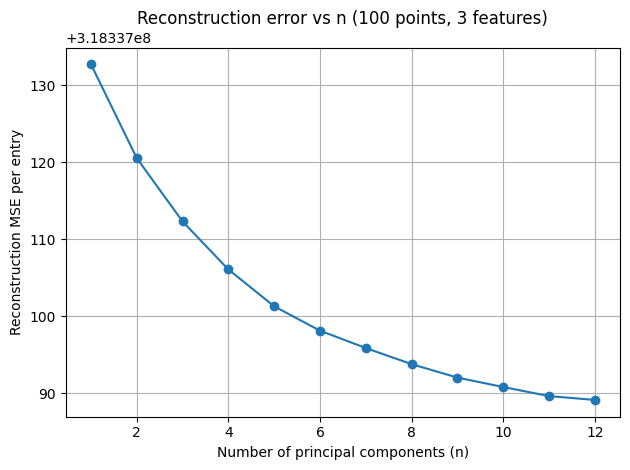

In [40]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure()
plt.plot(df["n_components"], df["MSE_per_entry"], marker='o')
plt.xlabel("Number of principal components (n)")
plt.ylabel("Reconstruction MSE per entry")
plt.title("Reconstruction error vs n (100 points, 3 features)")
plt.grid(True)
plt.tight_layout()

# Save the plot
plot_path = r"D:\PycharmProjects\pythonProject\U23AI113\ML_lAB\LAB_3\pc_reconstruction_error_house.png"
plt.savefig(plot_path)

# Display both outputs
plot_path, df.head()